In [86]:
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from scipy import optimize
from scipy.special import expit
from random import sample
import random

In [87]:
data = scipy.io.loadmat("ex4data1.mat")
weights = scipy.io.loadmat("ex4weights.mat")

In [88]:
X = data['X']; y = data['y']
theta = [weights['Theta1'], weights['Theta2']]

In [89]:
print("X", X.shape)
print("y", y.shape)
print("theta1", weights['Theta1'].shape)
print("theta2", weights['Theta2'].shape)

X (5000, 400)
y (5000, 1)
theta1 (25, 401)
theta2 (10, 26)


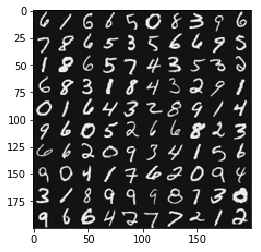

In [90]:
def displayData(X, index_list=[]):
    row, col = 10, 10
    h, w = 20, 20
    if len(index_list) == 0:
        index_list = sample(range(X.shape[0]), row * col)
        
    picture = np.zeros((row*h, col*w))
    i, j = 0, 0
    for index in index_list:
        if j == col:
            j = 0
            i += 1
        row_position = i * h
        col_position = j * w
        image = X[index].reshape(h, w).T
        #print(image.shape)
        #print(row_position, row_position + h, col_position, col_position + w)
        picture[row_position:row_position + h, col_position:col_position + w] = image
        j += 1
    
    plt.imshow(picture, cmap='gray')
    
displayData(X)

In [91]:
def feedForward(theta, feature):
    #print("feature:", feature.shape)
    #print("theta:")
    #for index, weight in enumerate(theta):
    #    print("\tindex", index, "-", weight.shape)
    
    a = feature
    for weight in theta:
        a = np.array(np.insert(a, 0, 1))
        z = weight.dot(a)
        a = scipy.special.expit(z)
    return a

np.argmax(feedForward(theta,X[1500]))

2

In [92]:
def costFunction(theta, X, y, alpha):
    print("X:", X.shape, "y:", y.shape, 'm:', len(y))
    print("theta:")
    for index, weight in enumerate(theta):
        print("\tindex", index, "-", weight.shape)
    
    answer_table = np.eye(10)
    
    total_cost = 0.
    m = len(y)
    for index in range(m):
        h = feedForward(theta, X[index])
        answer = answer_table[y[index]-1]
        #print(h.shape, answer.shape)
        left = -answer * np.log(h)
        right = (1-answer) * np.log(1-h)
        #print(left.shape)
        #print(right.shape)
        total_cost += left - right
   
    regular_term = 0.0
    
    for w in theta:
        regular_term += np.sum(w * w)
    regular_term *= alpha /(2*m)
    
    J = np.sum(total_cost)/m + regular_term
    return J    
print(costFunction(theta, X, y, 1.0))

X: (5000, 400) y: (5000, 1) m: 5000
theta:
	index 0 - (25, 401)
	index 1 - (10, 26)
0.38448779624289375


In [97]:
def sigmoid(z):
    return expit(z)

def sigmoidGradient(z):
    return sigmoid(z)*(1-sigmoid(z))

sigmoidGradient(0)

0.25

In [116]:
def randInitializeWeights(shape_list):
    theta = []
    epsilon_init = 0.12
    for shape in shape_list:
        theta.append(np.random.rand(shape[0], shape[1])*2*epsilon_init - epsilon_init)
    return theta
shape_list = []

input_layer_size = 400
hidden_

shape_list.append((25, 1 + 400))
shape_list.append((10, 1 + 25))
    
initial_theta = randInitializeWeights(shape_list)
print(initial_theta[0].shape)
print(initial_theta[1].shape)

(25, 401)
(10, 26)
